In [1]:
%pylab notebook
#lib for widgets
import ipywidgets as widg
#importing our lib for binning and fitting
from gymness import binning
from scipy import stats #need for chi2 statistics
from IPython.display import Latex
import pandas as pd
from gymness import binning

Populating the interactive namespace from numpy and matplotlib


### We calculate the offset of the probes after the change of the probe 2. 

We need a measure without plasma --> We can use the data for capacity calibration. 

In [2]:
#Global variables
df           = None
R            = 502. #circuit resistance 
capacity_1   = 1.14739401756e-09
capacity_2   = 1.3277203496e-09
e_charge     = -1.60217653*10**(-19)

<IPython.core.display.Javascript object>


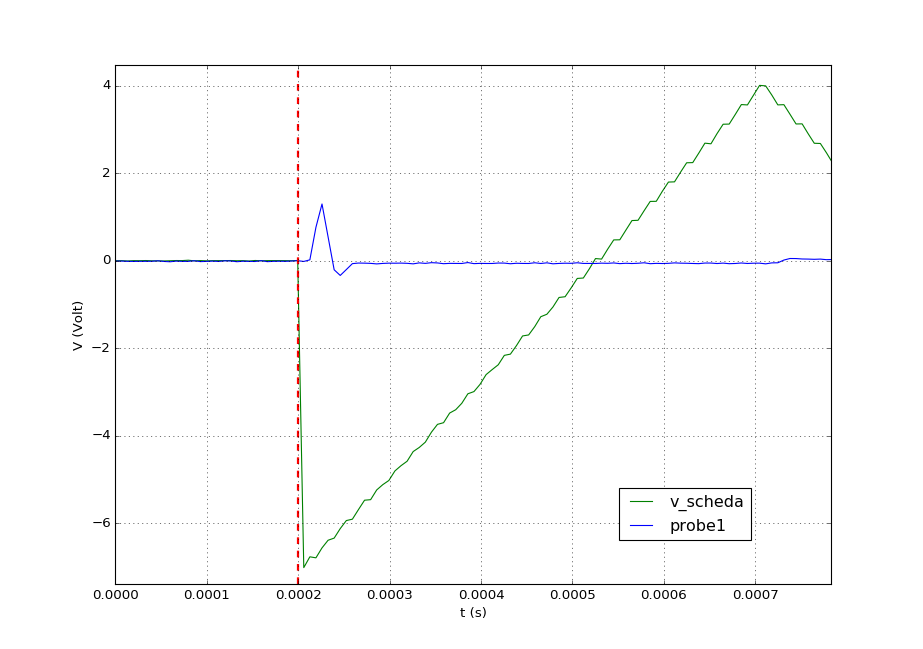

In [9]:
file_path1 = 'data/data_capacity/160526001.txt'
df1 = binning.read_data(file_path1, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns

fig, ax = plt.subplots(1,1)
ax.plot(df1.t, df1.v_scheda,'g')
ax.plot(df1.t, df1.v_res,'b', label="probe1")
ax.legend(bbox_to_anchor=(0.9,0.2))
ax.axvline(x=0.0002, color="red", linewidth=2, linestyle="dashed")
ax.grid()
ax.set_xlabel("t (s)")
ax.set_ylabel("V (Volt)")

In [4]:
file_path1 = 'data/data_capacity/160526001.txt' 
df = pd.read_csv(file_path1, delimiter='\t', usecols=[0,1,2,3], header=None)
df.columns = [ 't', 'x1', 'x2', 'x3' ]
df = df[(df.t<=0.0002)]
df = df.reset_index(drop=True)
#NOT AMPLIFIED
x = df['t']
df.head()
print('Loaded dataframe')

Loaded dataframe


<IPython.core.display.Javascript object>


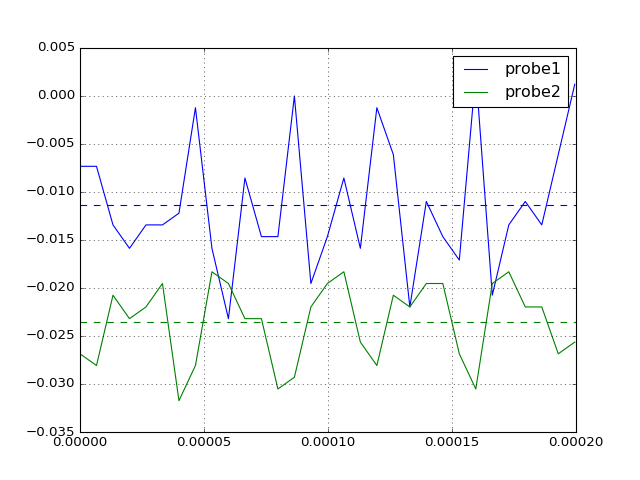

Offset  mean v_res1: -0.011380103326612902
Offset  mean v_res2: -0.023587134576612902
Offset between the two signals: 0.01220703125
N. points: 31


In [5]:
#gives an idea of the signal
offset1_a = df.x1.mean()
offset2_a = df.x2.mean()
offset1_a_std = df.x1.std()
offset2_a_std = df.x2.std()
plt.figure()
plt.xlim(0., 0.0002)
plt.grid(True)
plt.plot(x, df['x1'], label="probe1")
plt.plot(x, df['x2'], label="probe2")
plt.axhline(y=offset1_a, color="b", ls="dashed")
plt.axhline(y=offset2_a, color="g",ls= "dashed")
plt.legend()
print("Offset  mean v_res1: {}".format(df.x1.mean()))
print("Offset  mean v_res2: {}".format(df.x2.mean()))
print("Offset between the two signals: {}".format(df.x1.mean() - df.x2.mean()))
print("N. points: {}".format(len(df.x1)))


In [6]:
file_path2 = 'data/data_capacity/160526002.txt' 
df2 = pd.read_csv(file_path2, delimiter='\t', usecols=[0,1,2,3], header=None)
df2.columns = [ 't', 'x1', 'x2', 'x3' ]
df2 = df2[(df2.t<=0.0002)]
df2 = df2.reset_index(drop=True)
#NOT AMPLIFIED
x = df2['t']
df2.head()
print('Loaded dataframe')

Loaded dataframe


<IPython.core.display.Javascript object>


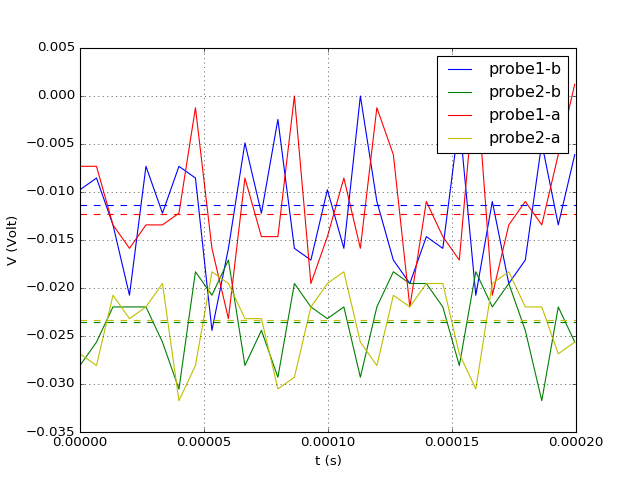

Offset  mean v_res1: -0.012246408770161291
Offset  mean v_res2: -0.02331149193548387
Offset between the two signals: 0.01106508316532258
N. points: 31
Offset signal_in: 0.0016538558467741936  +- 0.0037762747562872707
Offset signal_in: 0.0014175907258064517  +- 0.0033221187419823503


In [7]:
#gives an idea of the signal
offset1_b = df2.x1.mean()
offset2_b = df2.x2.mean()
offset1_b_std = df2.x1.std()
offset2_b_std = df2.x2.std()
plt.figure()
plt.xlim(0., 0.0002)
plt.grid(True)
plt.plot(x, df2['x1'],color="b", label="probe1-b")
plt.plot(x, df2['x2'],color="g", label="probe2-b")
plt.plot(x, df['x1'], color="r",label="probe1-a")
plt.plot(x, df['x2'], color="y",label="probe2-a")
#plt.plot(x, df['x3'])
plt.axhline(y=offset1_a, color="b", ls="dashed")
plt.axhline(y=offset2_a, color="g",ls= "dashed")
plt.axhline(y=offset1_b, color="r", ls="dashed")
plt.axhline(y=offset2_b, color="y",ls= "dashed")
plt.legend()
plt.xlabel("t (s)")
plt.ylabel("V (Volt)")

print("Offset  mean v_res1: {}".format(df2.x1.mean()))
print("Offset  mean v_res2: {}".format(df2.x2.mean()))
print("Offset between the two signals: {}".format(df2.x1.mean() - df2.x2.mean()))
print("N. points: {}".format(len(df2.x1)))
print("Offset signal_in: {}  +- {}".format(df.x3.mean(), df.x3.std()))
print("Offset signal_in: {}  +- {}".format(df2.x3.mean(), df2.x3.std()))

## Mean of offset for each channel

In [8]:
print("Offset channel 1: {} +- {}".format(np.mean([offset1_a,offset1_b]), np.sqrt(offset1_a**2 + offset1_b**2)))
print("Offset channel 2: {} +- {}".format(np.mean([offset2_a,offset2_b]), np.sqrt(offset2_a**2 + offset2_b**2)))

Offset channel 1: -0.011813256048387098 +- 0.01671769360558655
Offset channel 2: -0.023449313256048387 +- 0.03316290960988462
